### QED-C Application-Oriented Benchmarks - QSim Version

In [1]:
min_qubits=2
max_qubits=8
skip_qubits=1
max_circuits=3
num_shots=1000

backend_id="dm_simulator"
#backend_id="statevector_simulator"

#hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [2]:
import sys

sys.path[1:1] = [ "_common", "_common/qsim" ]

import execute as ex

noise = {
    'plot': False,
    "thermal_factor": 0.9,
    'show_partition': False,
    "decoherence_factor": 1.0,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 1.0,
    "rotation_error": {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]},  # Default values [1.0, 0.0]
    "tsp_model_error": [1.0, 0.0],
}

ex.options_noise = noise


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### If qiskit-provider-aer module not found error is coming, try to uninstall and re-install qiskit-aer module

In [4]:
# pip uninstall qiskit-aer -y

In [5]:
# pip install qiskit-aer

### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:19 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment ===========  {'shots': 0, 'success': True, 'data': {'partial_probability': {'00': 0.90245361328125, '01': 0.04754638671875, '10': 0.04749755859374999, '11': 0.00250244140625}, 'coeffmatrix': array([0.125  , 0.     , 0.     , 0.1125 , 0.     , 0.     , 0.     ,
       0.     ,

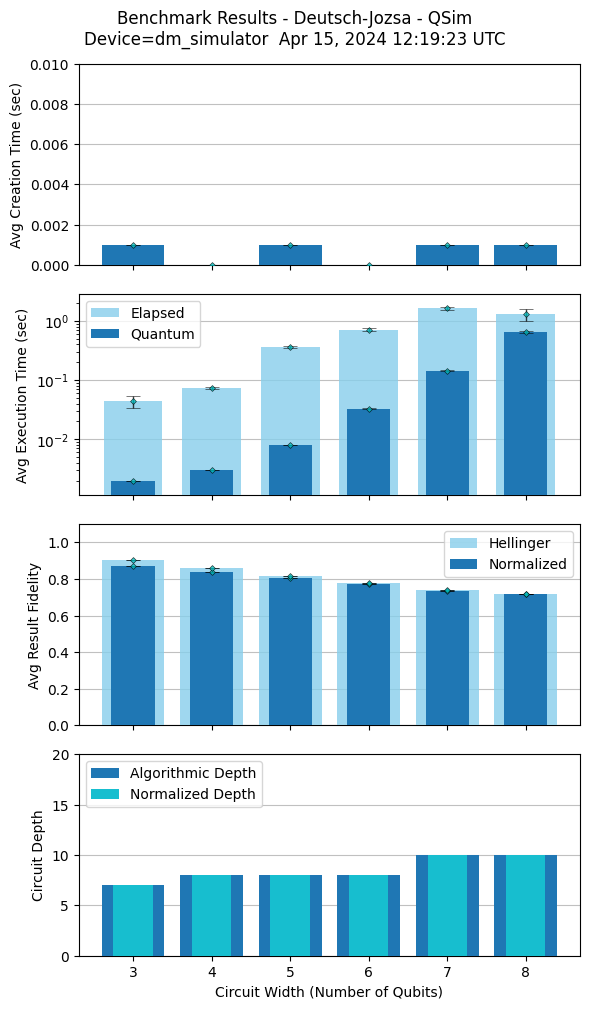

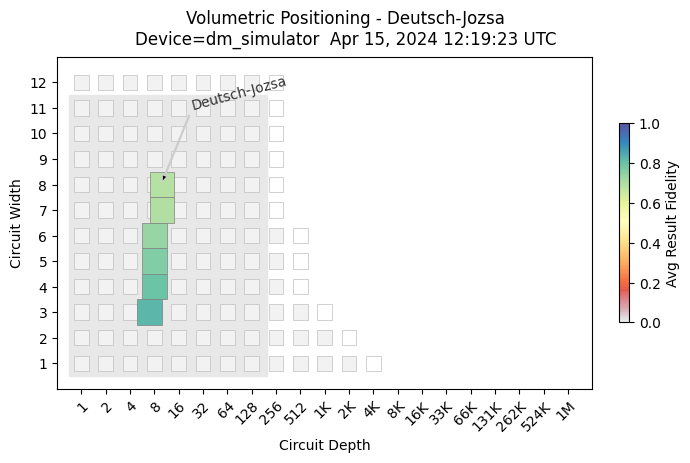

In [6]:
import sys
sys.path.insert(1, "deutsch-jozsa/qsim")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani (1) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:24 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
        ┌───┐┌───┐ ░ ┌─────┐ ░ ┌───┐┌───┐ ░       
q548_0: ┤ X ├┤ H ├─░─┤2    ├─░─┤ H ├┤ X ├─░───────
        ├───┤└───┘ ░ │     │ ░ ├───┤└───┘ ░    ┌─┐
q548_1: ┤ H ├──────░─┤1 Uf ├─░─┤ H ├──────░────┤M├
        ├───┤      ░ │     │ ░ ├───┤      ░ ┌─┐└╥┘
q548_2: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├─╫─
        └───┘      ░ └─────┘ ░ └───┘      ░ └╥┘ ║ 
 c12: 2/═════════════════════════════════════╩══╩═
                                             1  0 

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]
        ┌───┐┌───┐ ░ ┌─────┐ ░ ┌───┐┌───┐ ░       
q592_0: ┤ X ├┤ H ├─░─┤2    ├─░─┤ H ├┤ X ├─░───

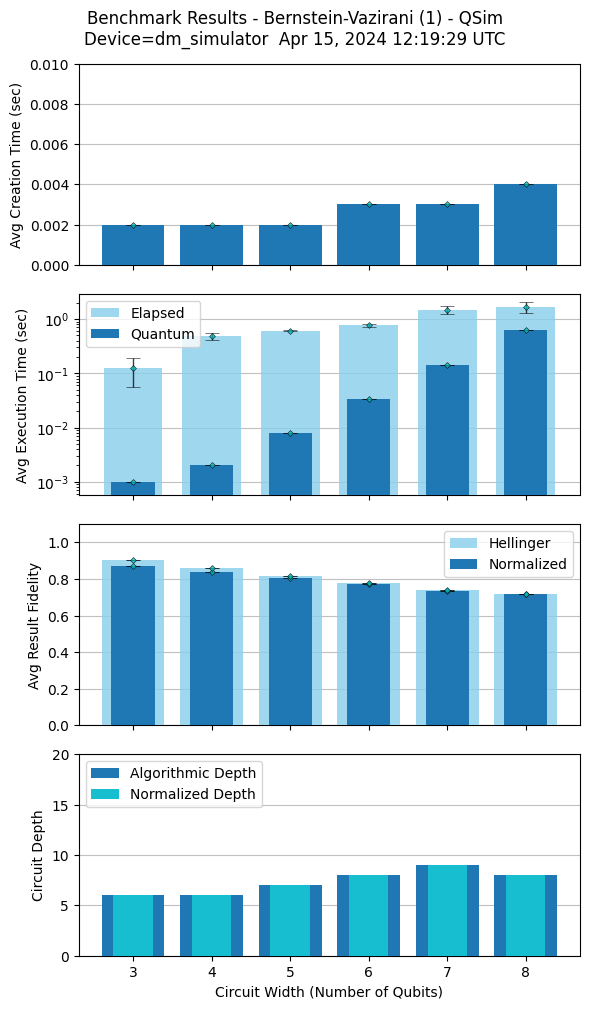

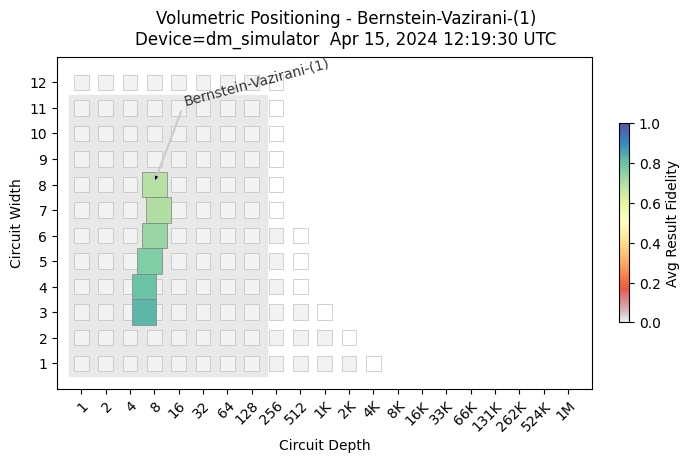

In [7]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 2

Bernstein-Vazirani (2) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:31 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
         ┌───┐┌───┐ ░      ┌───┐                  ┌───┐             
q1332_0: ┤ X ├┤ H ├─░──────┤ X ├──────────────────┤ X ├─────────────
         └───┘└───┘ ░ ┌───┐└─┬─┘┌───┐┌─┐     ┌───┐└─┬─┘┌───┐┌─┐     
q1332_1: ───────────░─┤ H ├──■──┤ H ├┤M├─|0>─┤ H ├──■──┤ H ├┤M├─|0>─
                    ░ └───┘     └───┘└╥┘     └───┘     └───┘└╥┘     
  c30: 2/═════════════════════════════╩══════════════════════╩══════
                                      1                      0      

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]
         ┌───┐┌───┐ ░                 
q1383_0: ┤ X ├┤ H ├─░─────────────

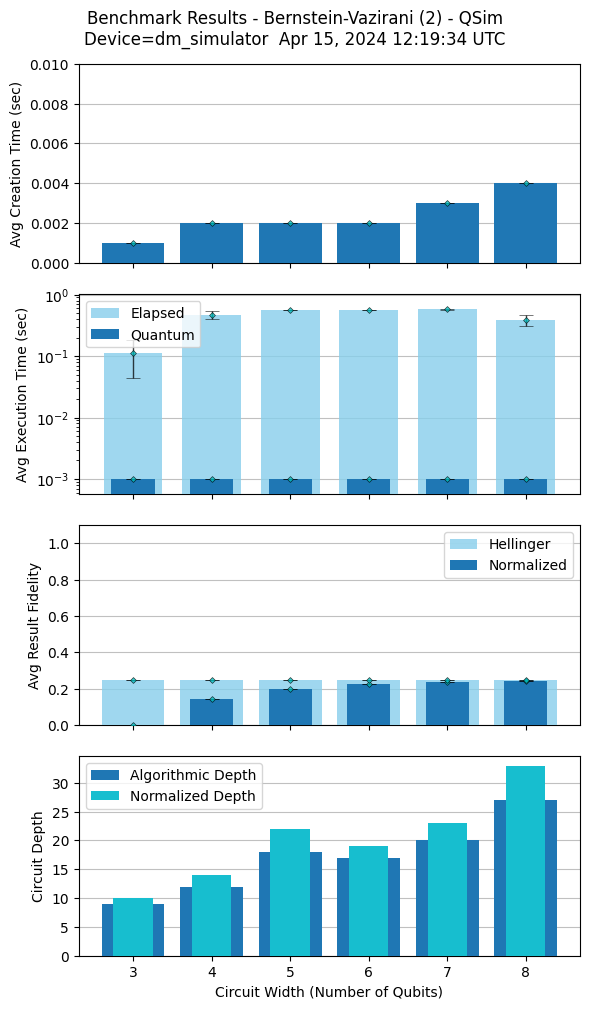

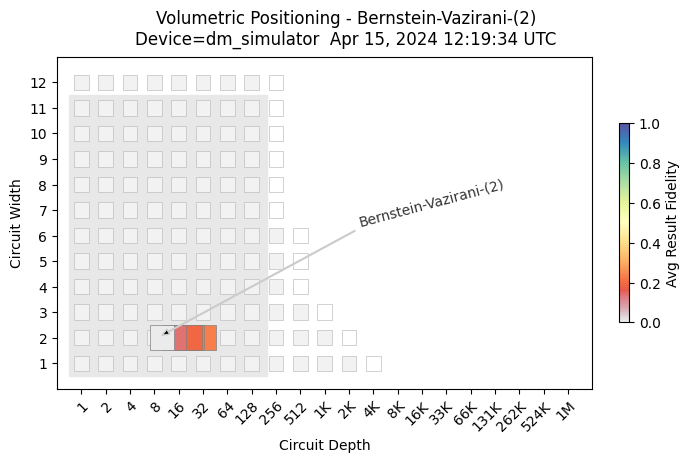

In [8]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hidden Shift

Hidden Shift Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:35 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment ==

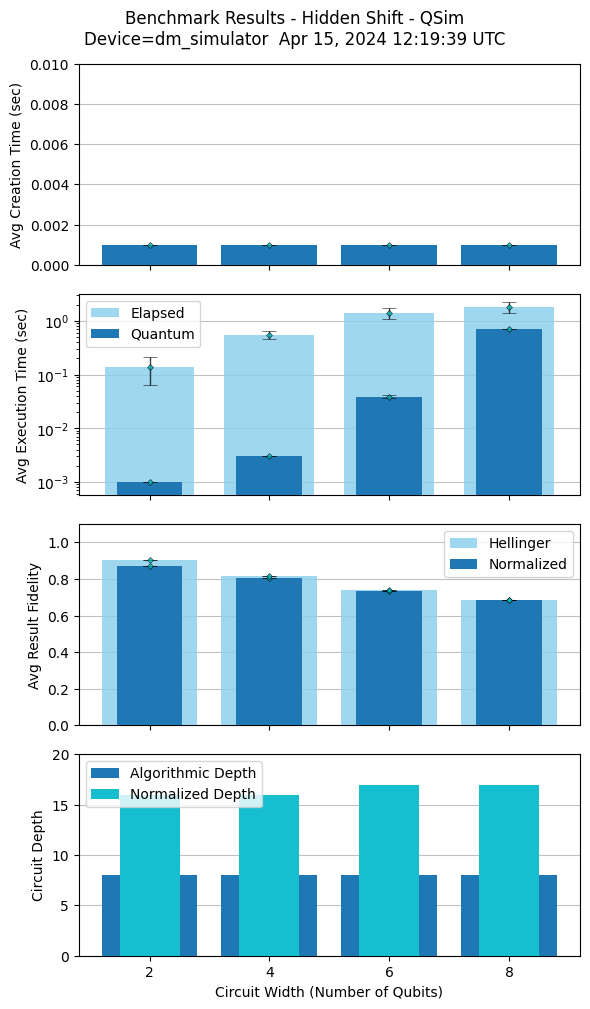

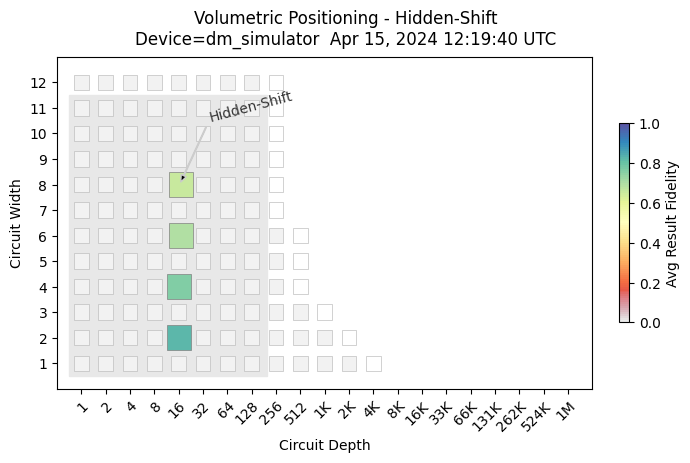

In [9]:
import sys
sys.path.insert(1, "hidden-shift/qsim")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                #hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform (1) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:41 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

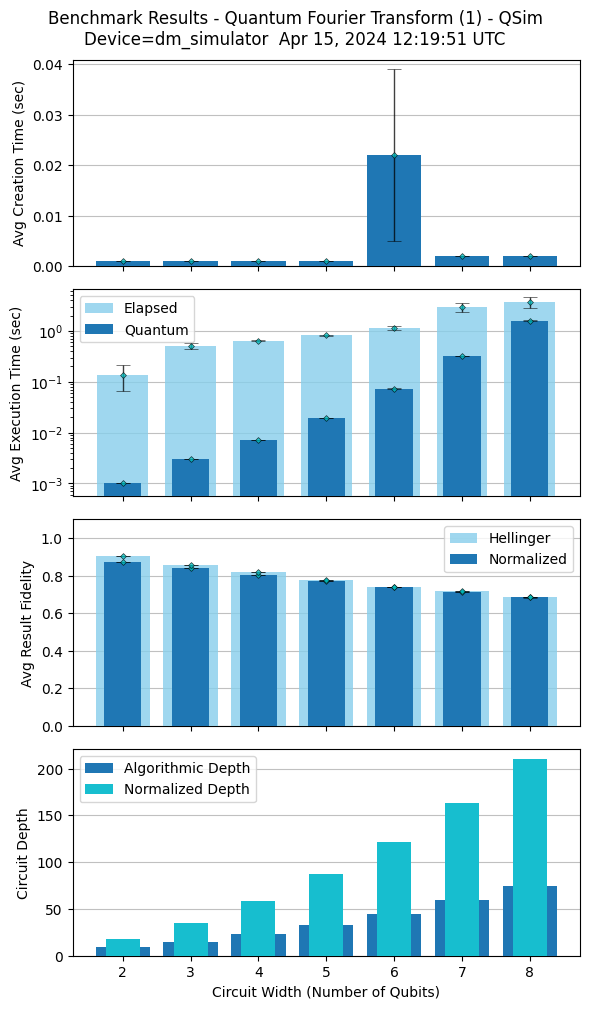

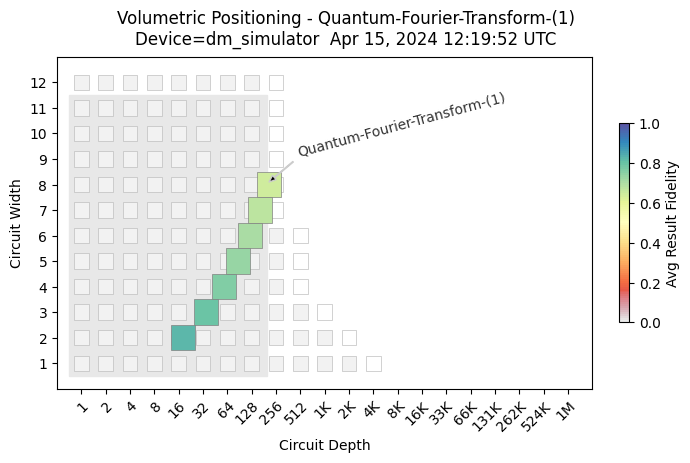

In [10]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Quantum Fourier Transform - Method 2

Quantum Fourier Transform (2) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:19:52 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

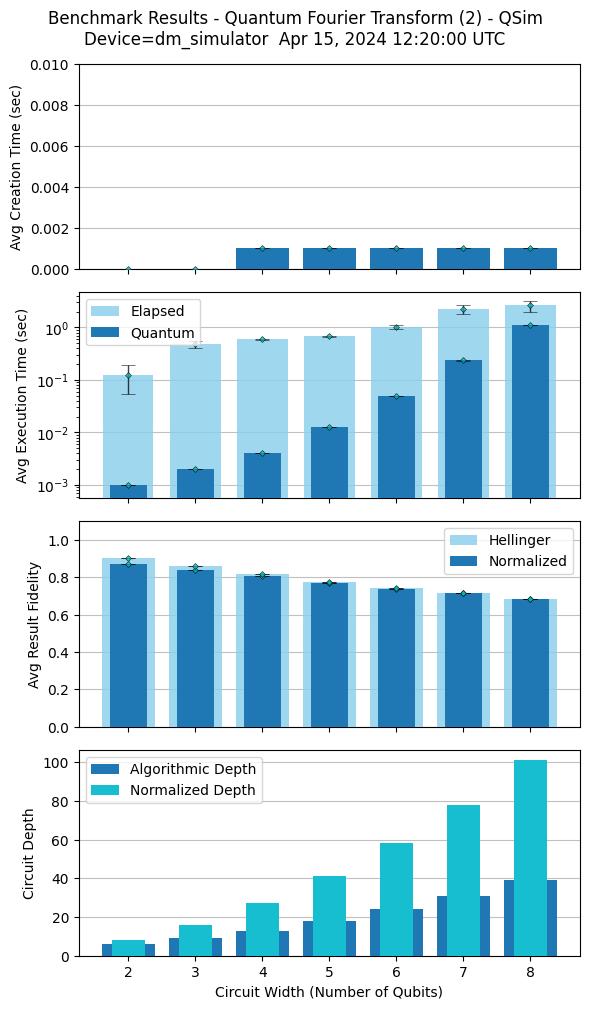

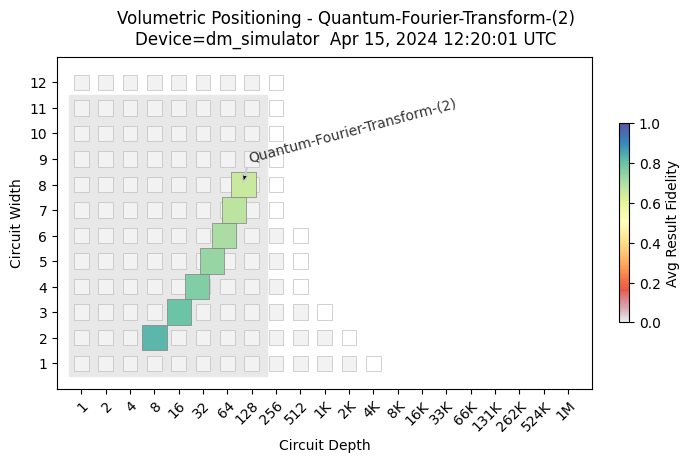

In [11]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Grover

Grover's Search Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:20:02 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment

/home/cdac/Desktop/QSim_Repo/QC_Benchmarks_using_dm-simulator/_common/qsim/metrics.py:686: RuntimeWarning: invalid value encountered in sqrt
  total += (np.sqrt(val) - np.sqrt(q_normed[key]))**2



Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment ===========  {'shots': 0, 'success': True, 'data': {'partial_probability': {'0000000': -0.0016327652105502756, '0000001': 0.0006482373327426688, '0000010': -0.0018079533896036464, '0000011': -0.001755447199385622, '0000100': -0.002368260370586058, '0000101': -0.0013790980431102164, '0000110': -0.0018016760673187611, '0000111': -0.0017689977455474471, '0001000': -0.0017584643527306654, '0001001': -0.0016422561825476592, '0001010': -0.0019796430185996094, '0001011': -0.0018249489461220816, '0001100': -0.0016527816432528215, '0001101': -0.001976696490902447, '0001110': -0.0019906626996584274, '0001111': -0.00182323441032692, '0010000': -0.0013354748378880555, '0010001': 0.046344465606320676, '0010010': -0

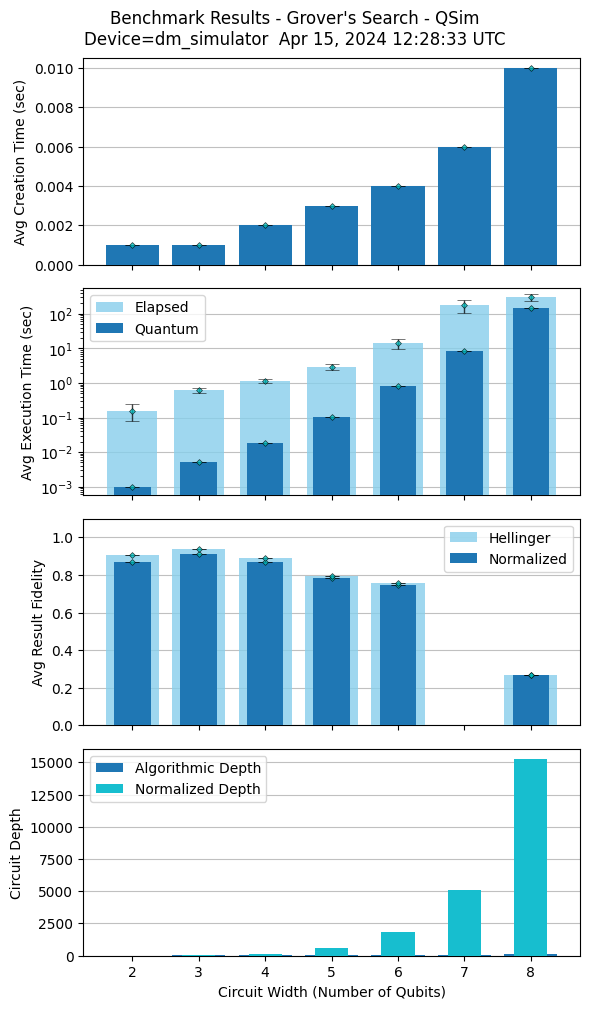

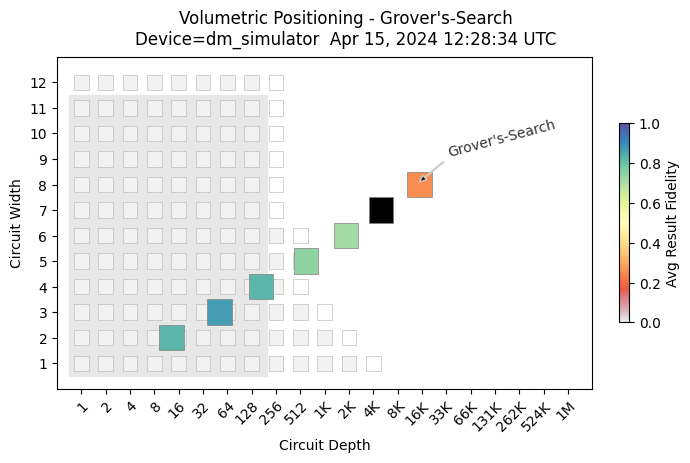

In [12]:
import sys
sys.path.insert(1, "grovers/qsim")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Phase Estimation

Phase Estimation Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:28:35 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment ===========  {'shots': 0, 'success': True, 'data': {'partial_probability': {'00': 0.90245361328125, '01': 0.04754638671875, '10': 0.04749755859374999, '11': 0.00250244140625}, 'coeffmatrix': array([ 0.125  ,  0.     ,  0.     ,  0.1125 ,  0.     ,  0.     ,
        0.     

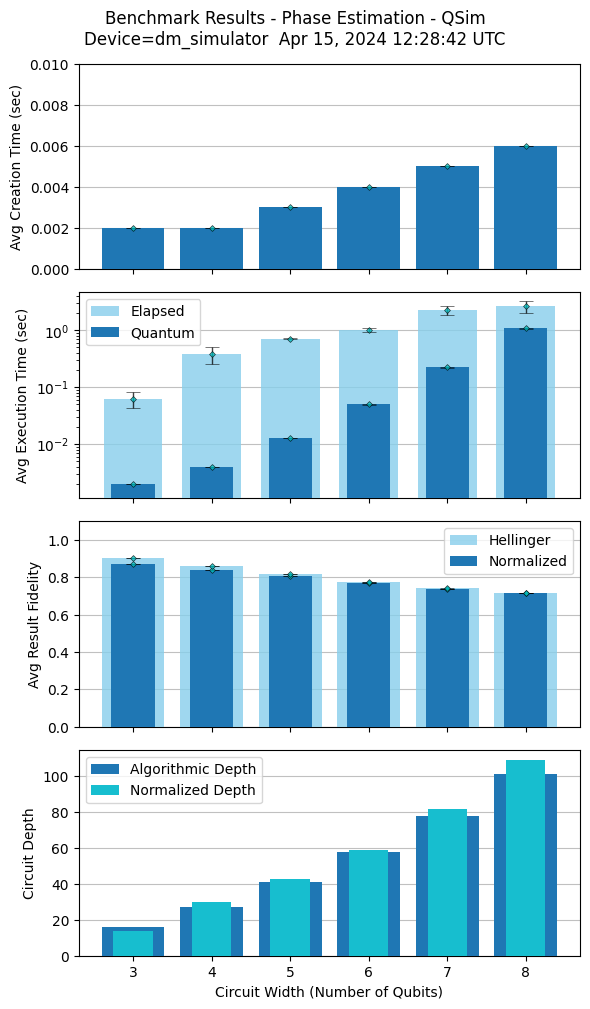

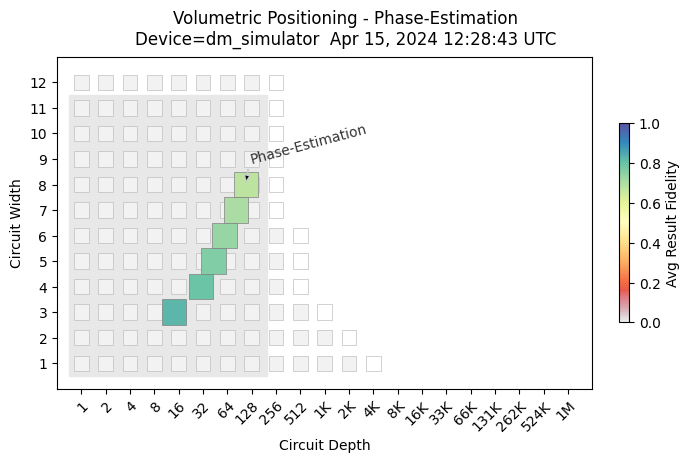

In [13]:
import sys
sys.path.insert(1, "phase-estimation/qsim")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### HHL Linear Solver

HHL Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:28:44 UTC
DM_SIMULATOR
************
Executing 3 circuits with 4 qubits, using 1 input qubits and 1 clock qubits

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.

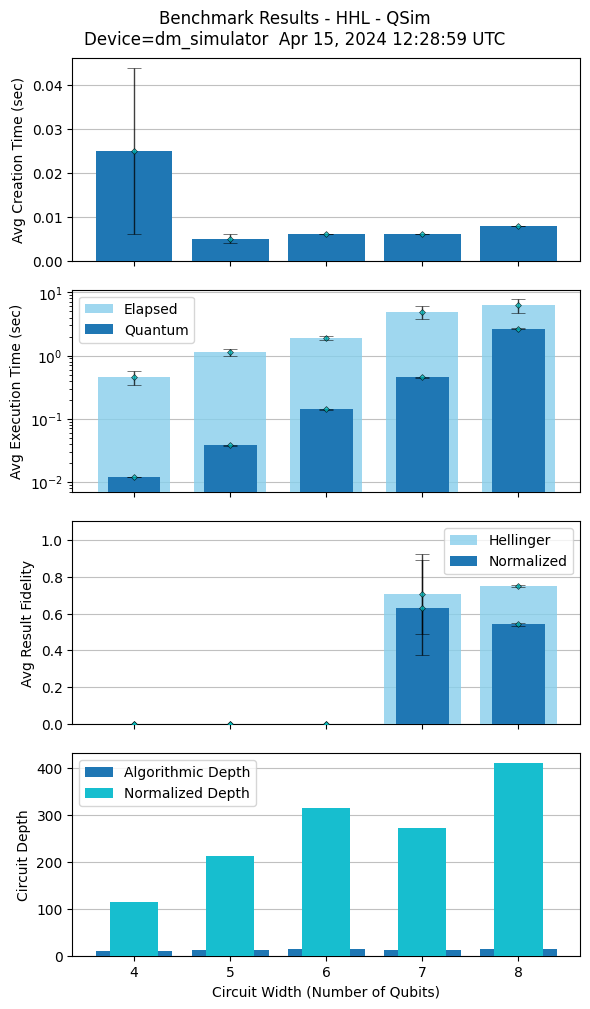

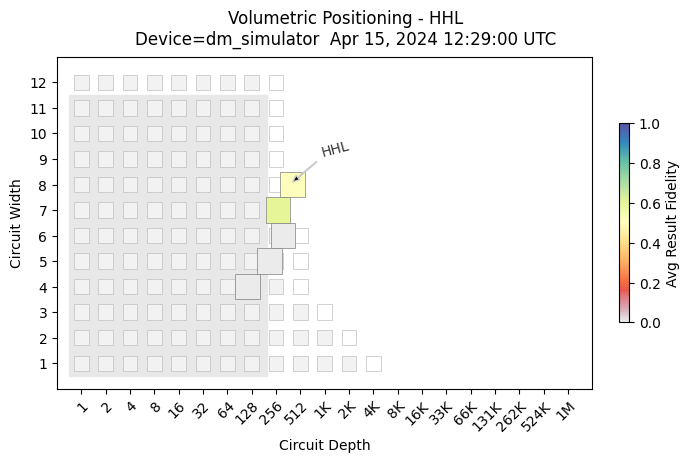

In [14]:
import sys
sys.path.insert(1, "hhl/qsim")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Amplitude Estimation

Amplitude Estimation Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:29:01 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experiment ===========  {'shots': 0, 'success': True, 'data': {'coeffmatrix': array([0.125 , 0.    , 0.    , 0.1125, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.125 , 0.    , 0.    , 0.1125,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.   

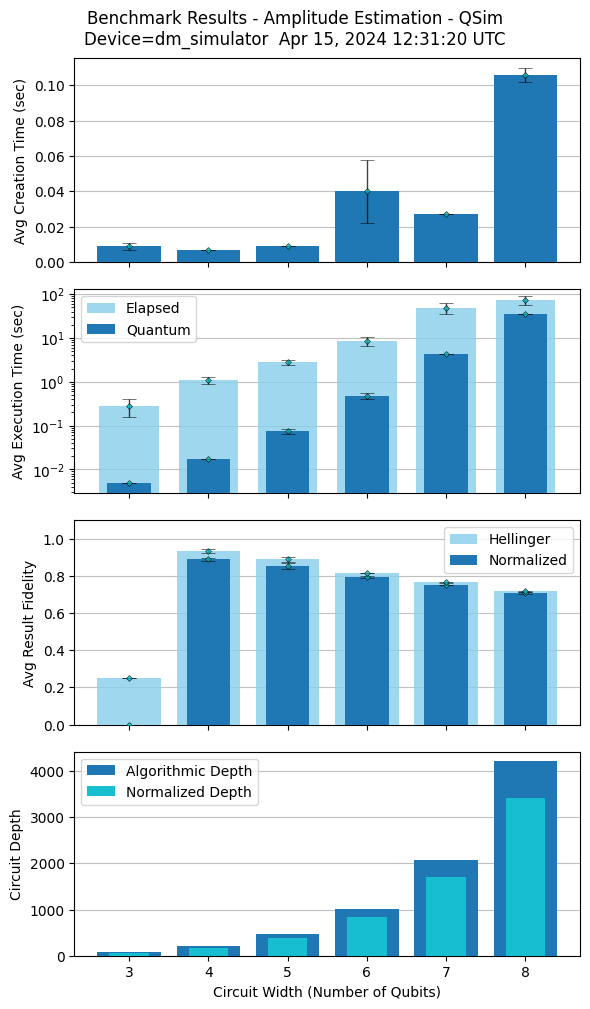

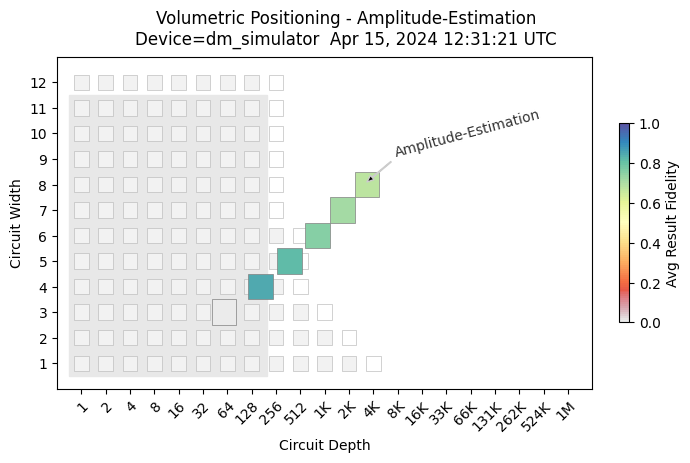

In [15]:
import sys
sys.path.insert(1, "amplitude-estimation/qsim")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project,
                exec_options=exec_options)

### Monte Carlo

Monte Carlo Sampling (2) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:31:21 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 4

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 E

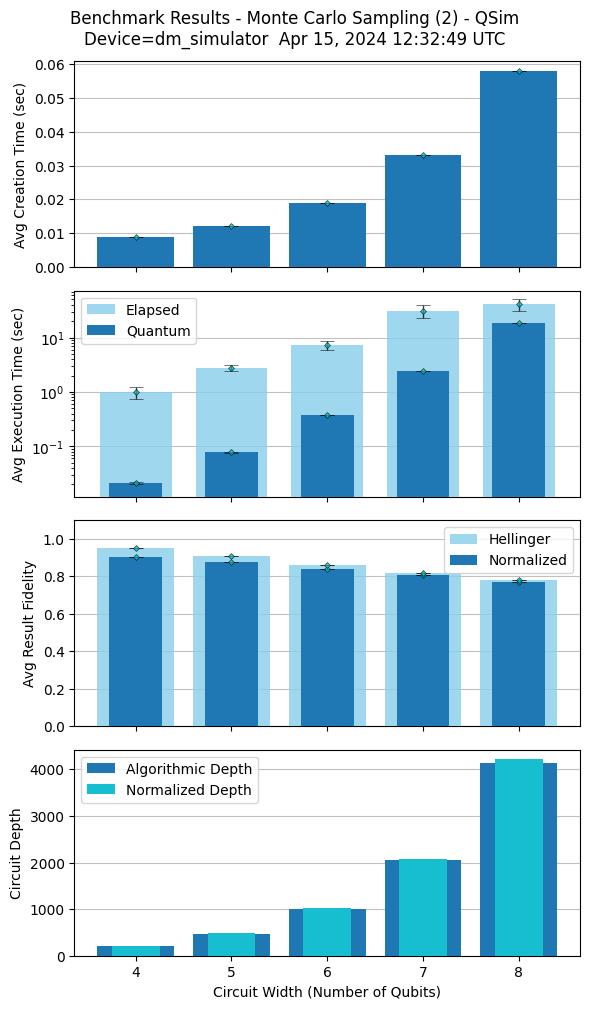

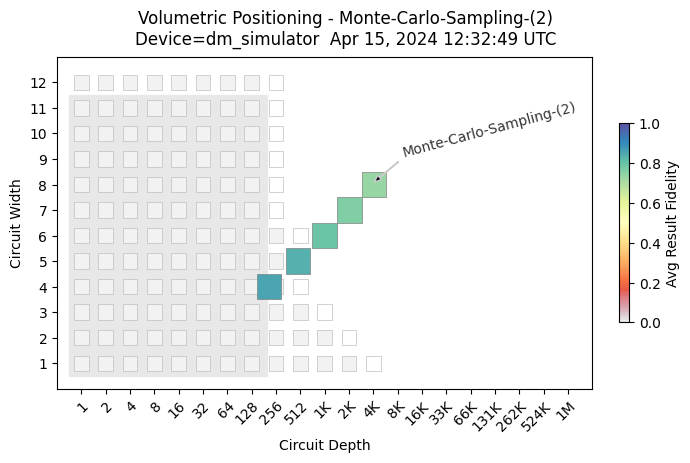

In [16]:
import sys
sys.path.insert(1, "monte-carlo/qsim")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hamiltonian Simulation

Hamiltonian Simulation Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:32:50 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Exp

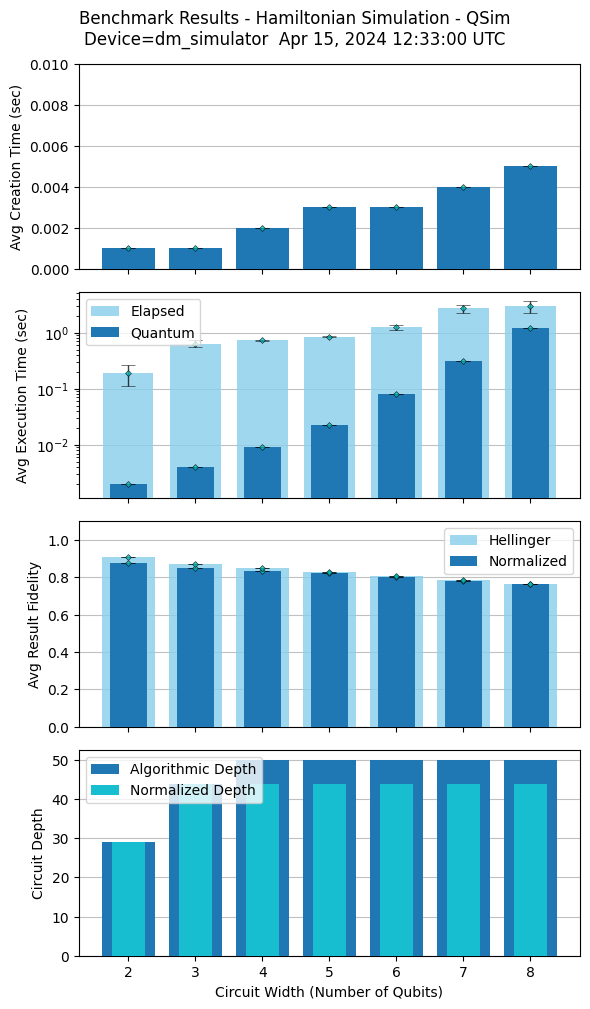

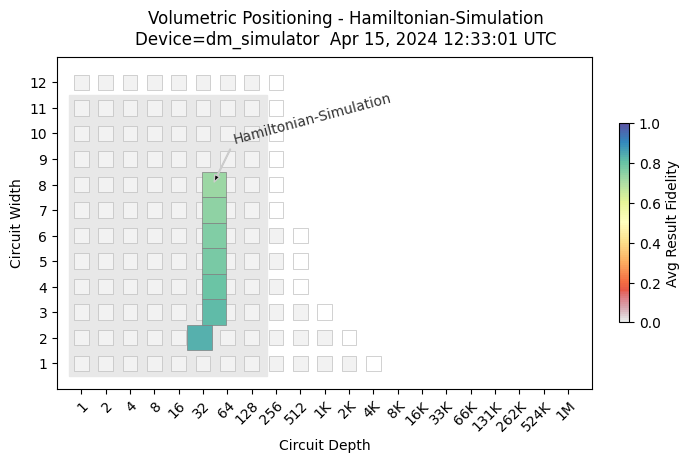

In [17]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qsim")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### VQE - Method 1

VQE Simulation (1) Benchmark Program - QSim
... execution starting at Apr 15, 2024 12:33:01 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 4

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]


 Experim

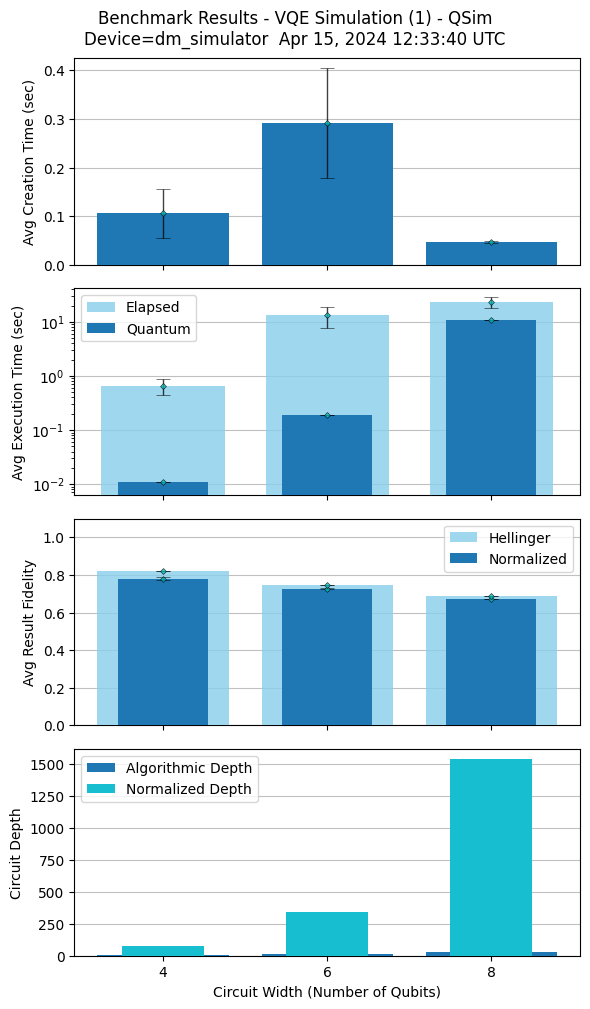

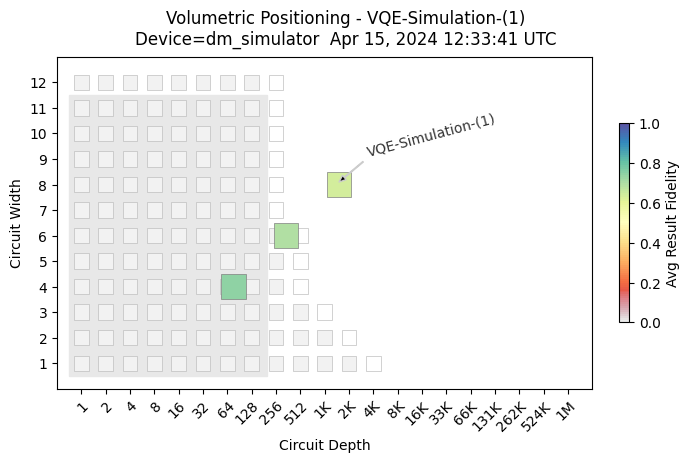

In [18]:
import sys
sys.path.insert(1, "vqe/qsim")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Shor - Method 1

In [19]:
import sys
sys.path.insert(1, "shors/qsim")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

Shor's Order Finding (1) Benchmark - QSim
Max number of qubits 8 is too low to run method 1 of Shor's Order Finding


### Shor - Method 2

In [20]:
import sys
sys.path.insert(1, "shors/qsim")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project,
                exec_options=exec_options)

Shor's Order Finding (2) Benchmark - QSim
... execution starting at Apr 15, 2024 12:33:41 UTC
DM_SIMULATOR
************
Executing [1] circuits with num_qubits = 7

Options with noise:
plot: False
thermal_factor: 0.9
show_partition: False
decoherence_factor: 1.0
depolarization_factor: 0.9
bell_depolarization_factor: 1.0
decay_factor: 1.0
rotation_error: {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]}
tsp_model_error: [1.0, 0.0]
ERROR: Failed to execute circuit 7 (3, 2)
... exception = 'QasmQobjInstruction' object has no attribute 'qubits'
... execution complete at Apr 15, 2024 12:33:44 UTC in 2.796 secs

Sample Circuit:
                ░  ┌───┐ ┌───┐┌──────────┐┌──────┐┌───┐┌─┐┌─┐ ░  ┌───┐ ┌───┐»
  q13977: ──────░──┤ X ├─┤ H ├┤0         ├┤ P(0) ├┤ H ├┤M├┤M├─░──┤ X ├─┤ H ├»
          ┌───┐ ░  └─╥─┘ └───┘│          │└──╥───┘└───┘└╥┘└╥┘ ░  └─╥─┘ └───┘»
q13978_0: ┤ X ├─░────╫────────┤1         ├───╫──────────╫──╫──░────╫────────»
          └───┘ ░    ║        │          │   ║        

### Combined Benchmark Results

****** NO RESULTS for Shor's Order Finding (2) ****** 


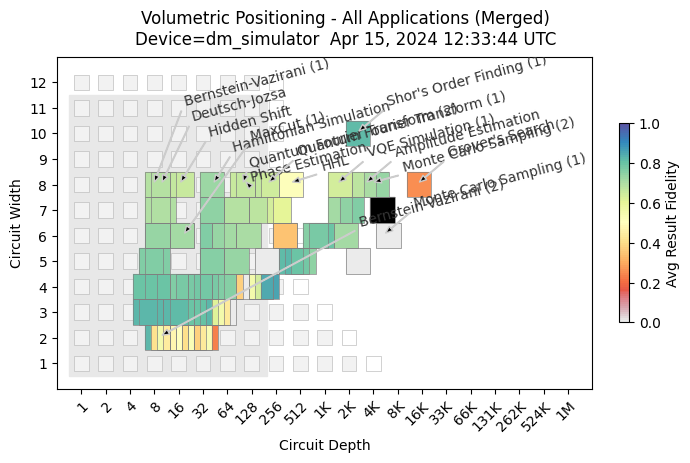

In [21]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)